In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!gdown --id 1xWnUHntwyOc4_wvdLu7rhZUtLj4741XG

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xWnUHntwyOc4_wvdLu7rhZUtLj4741XG
To: /content/Picture_LPE__calibrated.zip
100% 4.46M/4.46M [00:00<00:00, 70.4MB/s]


In [4]:
!unzip /content/Picture_LPE__calibrated.zip

Archive:  /content/Picture_LPE__calibrated.zip
   creating: Picture_LPE__calibrated/
  inflating: Picture_LPE__calibrated/pH = 10.jpg  
  inflating: Picture_LPE__calibrated/pH = 11.jpg  
  inflating: Picture_LPE__calibrated/pH = 12.jpg  
  inflating: Picture_LPE__calibrated/pH = 2.jpg  
  inflating: Picture_LPE__calibrated/pH = 3.jpg  
  inflating: Picture_LPE__calibrated/pH = 4.jpg  
  inflating: Picture_LPE__calibrated/pH = 5.jpg  
  inflating: Picture_LPE__calibrated/pH = 6.jpg  
  inflating: Picture_LPE__calibrated/pH = 7.jpg  
  inflating: Picture_LPE__calibrated/pH = 8.jpg  
  inflating: Picture_LPE__calibrated/pH = 9.jpg  


In [19]:
!gdown --id 11RxVW2ybBv1KR_fy1g7oV8ngaPSKKIQm

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11RxVW2ybBv1KR_fy1g7oV8ngaPSKKIQm
To: /content/Jabuticaba_calibrated.zip
100% 27.1M/27.1M [00:00<00:00, 129MB/s]


In [ ]:
!unzip /content/Jabuticaba_calibrated.zip

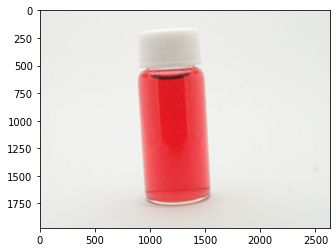

In [22]:
image_file = '/content/Jabuticaba_calibrated/pH = 2.jpg'
plt.imshow(matplotlib.image.imread(image_file))

In [23]:
t = time.time()
image = PIL.Image.open(image_file)
image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()

print(image_tensor)

output = model([image_tensor])[0]
print('executed in %.3fs' % (time.time() - t))

tensor([[[0.9137, 0.9176, 0.9255,  ..., 0.8902, 0.9098, 0.9098],
         [0.9216, 0.9255, 0.9294,  ..., 0.9137, 0.9176, 0.9176],
         [0.9020, 0.9059, 0.9137,  ..., 0.9137, 0.9020, 0.9020],
         ...,
         [0.9098, 0.9255, 0.9176,  ..., 0.8627, 0.8549, 0.8549],
         [0.9098, 0.9255, 0.9176,  ..., 0.8863, 0.8784, 0.8784],
         [0.9098, 0.9255, 0.9176,  ..., 0.8941, 0.8863, 0.8863]],

        [[0.9216, 0.9255, 0.9333,  ..., 0.8980, 0.9176, 0.9176],
         [0.9294, 0.9333, 0.9373,  ..., 0.9216, 0.9255, 0.9255],
         [0.9098, 0.9137, 0.9216,  ..., 0.9216, 0.9098, 0.9098],
         ...,
         [0.9098, 0.9255, 0.9176,  ..., 0.8745, 0.8667, 0.8667],
         [0.9098, 0.9255, 0.9176,  ..., 0.8980, 0.8902, 0.8902],
         [0.9098, 0.9255, 0.9176,  ..., 0.9059, 0.8980, 0.8980]],

        [[0.9098, 0.9137, 0.9216,  ..., 0.8863, 0.9059, 0.9059],
         [0.9176, 0.9216, 0.9255,  ..., 0.9098, 0.9137, 0.9137],
         [0.8980, 0.9020, 0.9098,  ..., 0.9098, 0.8980, 0.

In [5]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [6]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = model.eval().cuda()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

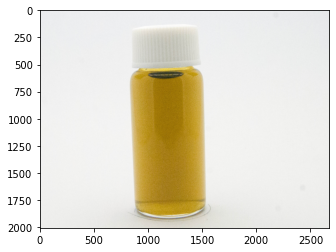

In [17]:
image_file = '/content/gdrive/MyDrive/NCHU/花青素/Class_PEPE/PFPE__calibrated/pH = 12.jpg'
plt.imshow(matplotlib.image.imread(image_file))

In [18]:
t = time.time()
image = PIL.Image.open(image_file)
image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()

print(image_tensor)

output = model([image_tensor])[0]
print('executed in %.3fs' % (time.time() - t))

tensor([[[0.9098, 0.9137, 0.9176,  ..., 0.8980, 0.8941, 0.8941],
         [0.9176, 0.9176, 0.9216,  ..., 0.9294, 0.9176, 0.9059],
         [0.9216, 0.9255, 0.9255,  ..., 0.9373, 0.9176, 0.9059],
         ...,
         [0.9059, 0.9098, 0.9137,  ..., 0.9020, 0.9176, 0.9294],
         [0.9020, 0.9059, 0.9098,  ..., 0.9137, 0.9020, 0.8941],
         [0.9176, 0.9216, 0.9255,  ..., 0.9137, 0.8980, 0.8902]],

        [[0.9137, 0.9176, 0.9216,  ..., 0.9020, 0.8980, 0.8980],
         [0.9216, 0.9216, 0.9255,  ..., 0.9333, 0.9216, 0.9098],
         [0.9255, 0.9294, 0.9294,  ..., 0.9412, 0.9216, 0.9098],
         ...,
         [0.9059, 0.9098, 0.9137,  ..., 0.9098, 0.9255, 0.9373],
         [0.9020, 0.9059, 0.9098,  ..., 0.9216, 0.9098, 0.9020],
         [0.9176, 0.9216, 0.9255,  ..., 0.9216, 0.9059, 0.8980]],

        [[0.9216, 0.9255, 0.9294,  ..., 0.9098, 0.9059, 0.9059],
         [0.9294, 0.9294, 0.9333,  ..., 0.9412, 0.9294, 0.9176],
         [0.9333, 0.9373, 0.9373,  ..., 0.9490, 0.9294, 0.

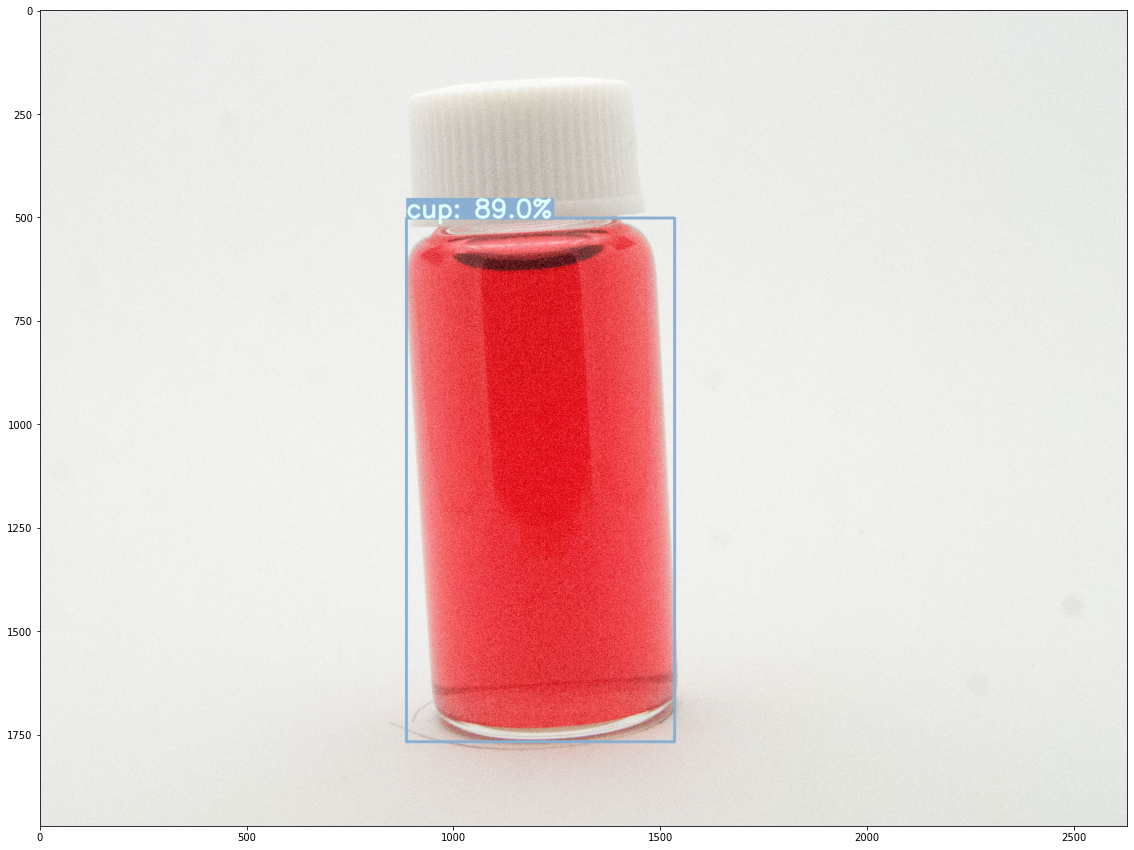

In [24]:
coco_names = ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
colors = [[random.randint(0, 255) for _ in range(3)] for _ in coco_names]

result_image = np.array(image.copy())
for box, label, score in zip(output['boxes'], output['labels'], output['scores']):
  if score > 0.5:
    color = random.choice(colors)
    
    # draw box
    tl = round(0.002 * max(result_image.shape[0:2])) + 1  # line thickness
    c1, c2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))

    # print(c1, c2)
    
    cv2.rectangle(result_image, c1, c2, color, thickness=tl)
    # draw text
    display_txt = "%s: %.1f%%" % (coco_names[label], 100*score)
    tf = max(tl - 1, 1)  # font thickness
    t_size = cv2.getTextSize(display_txt, 0, fontScale=tl / 3, thickness=tf)[0]
    c2_text = c1[0] + t_size[0], c1[1] - t_size[1] - 3
    cv2.rectangle(result_image, c1, c2_text, color, -1)  # filled
    cv2.putText(result_image, display_txt, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
  
plt.figure(figsize=(20, 15))
plt.imshow(result_image)

In [12]:
print(c1)

(814, 504)


In [13]:
print(c2)

(1553, 1922)


In [14]:
print(box[0])

tensor(55.4335, device='cuda:0')


In [15]:
# print((c2[0]+c1[0])/2)

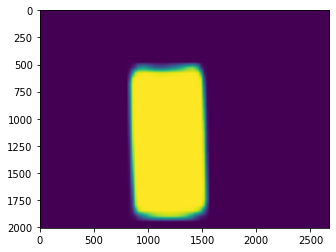

In [16]:
masks = None
for score, mask in zip(output['scores'], output['masks']):
  if score > 0.5:
    if masks is None:
      masks = mask
    else:
      masks = torch.max(masks, mask)

plt.imshow(masks.squeeze(0).cpu().numpy())

In [ ]:
print(type(image))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


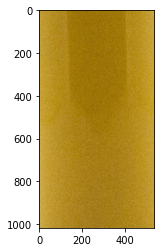

In [ ]:
# Importing Image class from PIL module
from PIL import Image
 
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = image.size
 
# Setting the points for cropped image
left = c1[0]+100
top = c1[1]+200
right = c2[0]-100
bottom = c2[1]-200
 
# Cropped image of above dimension
# (It will not change original image)
img_crop = image.crop((left, top, right, bottom))
 
# Shows the image in image viewer
plt.imshow(img_crop)

In [ ]:
img_crop.save("/content/gdrive/MyDrive/NCHU/花青素/Class_PEPE/PEPE_detect_img/image_crop_ph12.jpg")